In [6]:
#Q1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [15]:
# Step 1: Load the dataset (Assuming the file is 'data_banknote_authentication.txt')
# Specify the delimiter if the file is space-separated or comma-separated
df = pd.read_csv('data_banknote_authentication.txt', delimiter=',', header=None,
                 names=['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'])
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [16]:
# Step 2: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64


In [17]:
# Step 3: Check the data types of the columns
print("\nData Types of Columns:")
print(df.dtypes)


Data Types of Columns:
Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object


In [18]:
# Step 4: Ensure all columns are of numeric type (except the target 'Class')
df[['Variance', 'Skewness', 'Curtosis', 'Entropy']] = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']].apply(pd.to_numeric, errors='coerce')

In [19]:
# Step 5: Separate the features (X) and target variable (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable


In [20]:
# Step 6: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Step 7: Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

In [22]:
# Step 8: Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# Step 9: Make predictions on the test data
y_pred = model.predict(X_test)

In [24]:
# Step 10: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.18%


In [25]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[148   0]
 [  5 122]]


In [26]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       148
           1       1.00      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



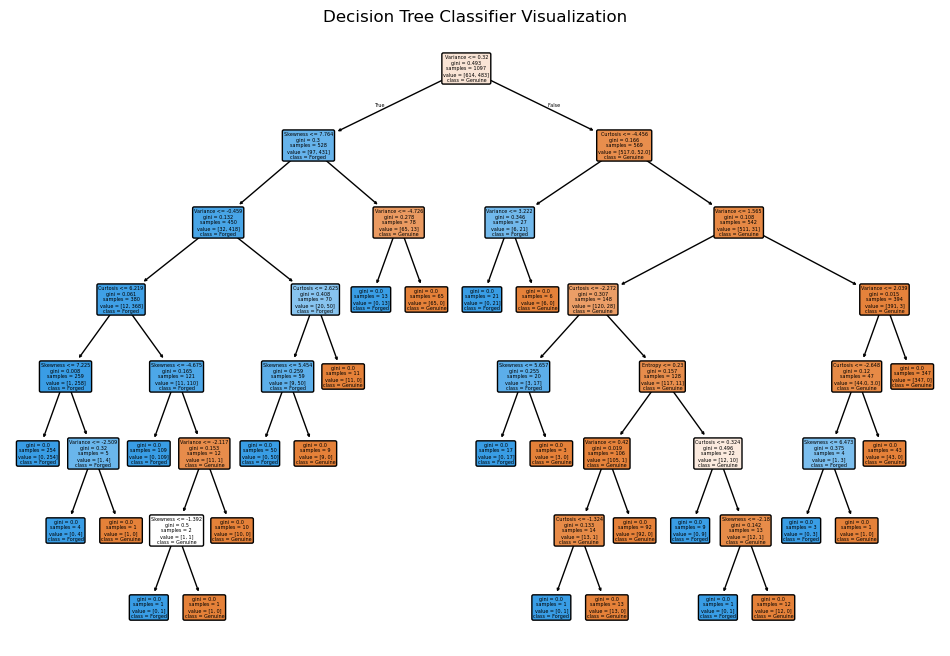

In [27]:
# Step 11: Visualize the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Genuine', 'Forged'], rounded=True)
plt.title('Decision Tree Classifier Visualization')
plt.show()

In [28]:
#Q2
#Q2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [29]:
# Step 1: Load the dataset
df = pd.read_csv('UniversalBank.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [30]:
# Step 2: Data Preprocessing
# Assuming 'Personal Loan' is the target variable and the rest are features
# Drop columns that are not useful for prediction (e.g., 'ID' or 'ZIP Code')
df = df.drop(columns=['ID', 'ZIP Code'])

In [31]:
# If there are any categorical variables, you can encode them (this is an example)
# df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Separate features (X) and target variable (y)
X = df.drop(columns=['Personal Loan'])  # Features
y = df['Personal Loan']  # Target

In [32]:
# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Step 4: Standardize the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
# Step 5: Create and train the Linear SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

In [36]:
# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.30%


In [37]:
# You can also print the coefficients of the linear model
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model coefficients: [[-0.26042129  0.39039967  1.27313837  0.37903704  0.09792978  0.79499141
   0.01053257 -0.14166248  0.52094773 -0.13763935 -0.34797031]]
Intercept: [-2.61333988]
